Author: Vincent Weisser (vincent.weisser@code.berlin), WS19 Data Science by Florencia Noriega

# Analysing Apples Stock Valuation from 2011-2018 


### Main questions
- Exploring how Apples stock valuations developed between 2011-2018

### Structure of the study
- Collected the necessary data for Apple over the period 2011-2018 through the API of quandl.com
- Explored, analysed and visualised the data to derive trends and insights
- Checked the validity of my derived insights and trends with outside sources in the end summary. 

### Trends and Findings 
- Apples return ratios display that Apples business has stayed extremely profitable as displayed by the nearly constant **gross margin of around 40% and average yearly net income growth of ~15,1%**. The reason for the decline of their financial return ratios was mainly due to much higher revenue and assets over the years and increasing investments.
- Apples valuation ratios (Price-Earnings-Ratio = PE) display that Apples stock has became more expensive between 2011-2018.
- Apples Price-Earnings-Ratio (PE) has significantly gone up between 2011-2018, **now being 18x p/e, 20% above its average of 15x p/e (between 2011-2018) and 55% higher than its lowest p/e of 11,84** (2013)

### Import Financial Data

Imported US Fundamentals Dataset from Quandl

In [285]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns



In [2]:
import quandl

quandl.ApiConfig.api_key = ""
df = quandl.get_table("SHARADAR/SF1", paginate=True)

## Dataset Exploration: Displaying all values

In [367]:
pd.set_option('display.max_colwidth', -1)

df


,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
None,,,,,,,,,,,,,,,,,,,,,
0,XOM,MRY,2018-12-31,2018-12-31,2018-12-31,2019-11-06,-19564000000,346196000000,349610000000,4.797300e+10,...,4233807170,4233807170,NaN,68.546,346196000000,0,9532000000,29856000000,81.769,-9.165000e+09
1,XOM,MRY,2017-12-31,2017-12-31,2017-12-31,2019-11-06,-16262000000,348691000000,346334750000,4.713400e+10,...,4237106077,4237106077,NaN,57.672,348691000000,0,-1174000000,29938000000,82.295,-1.063700e+10
2,XOM,MRY,2016-12-31,2016-12-31,2016-12-31,2019-11-06,-22239000000,330314000000,338740500000,4.141600e+10,...,4146693326,4146693326,NaN,50.188,330314000000,0,-406000000,36656000000,79.657,-6.222000e+09
3,XOM,MRY,2015-12-31,2015-12-31,2015-12-31,2019-11-06,-23511000000,336758000000,342160250000,4.262300e+10,...,4162938512,4162938512,NaN,59.873,336758000000,0,5415000000,39620000000,80.894,-1.135300e+10
4,XOM,MRY,2014-12-31,2014-12-31,2014-12-31,2019-11-06,-18957000000,349493000000,353469000000,5.291000e+10,...,4234528643,4234528643,NaN,97.281,349493000000,0,18015000000,44168000000,82.534,-1.172300e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,AAPL,MRY,2015-12-31,2015-09-26,2015-09-26,2019-11-16,-345000000,290345000000,271646000000,8.937800e+10,...,5702722000,5753421000,5.793069e+09,40.622,281336000000,0,19121000000,0,48.899,8.768000e+09
244,AAPL,MRY,2014-12-31,2014-09-27,2014-09-27,2019-11-16,1082000000,231839000000,221383000000,6.853100e+10,...,5987867000,6085572000,6.122663e+09,30.037,223081000000,4318000000,13973000000,0,36.657,5.083000e+09
245,AAPL,MRY,2013-12-31,2013-09-28,2013-09-28,2019-11-16,-471000000,207000000000,199421750000,7.328600e+10,...,6359479000,6477320000,6.521634e+09,26.386,201244000000,3453000000,13118000000,0,31.069,2.962800e+10


## Listing all columns, data points

In [340]:
# df.columns.tolist()


# Financial Data Guide

### Financial Return Metrics
**ROA = Return on Average Assets:** An indicator of how profitable a company is relative to its total assets. ROA gives a manager, investor, or analyst an idea as to how efficient a company's management is at using its assets to generate earnings. Return on assets is displayed as a percentage.

**ROE = Return on Average Equity:** A financial ratio that measures the performance of a company based on its average shareholders' equity outstanding. Typically, ROAE refers to a company's performance over a fiscal year, so the ROAE numerator is net income and the denominator is computed as the sum of the equity value at the beginning and end of the year, divided by 2.

**ROIC = Return on Invested Capital:** A calculation used to assess a company's efficiency at allocating the capital under its control to profitable investments. The return on invested capital ratio gives a sense of how well a company is using its money to generate returns. Comparing a company's return on invested capital with its weighted average cost of capital (WACC) reveals whether invested capital is being used effectively. This measure is also known simply as "return on capital."

**ROS = Return on Sales:** A ratio used to evaluate a company's operational efficiency.This measure provides insight into how much profit is being produced per dollar of sales. An increasing ROS indicates that a company is growing more efficiently, while a decreasing ROS could signal impending financial troubles.

—

**assets** = All Assets of the Company

**rnd** = Research & Development Investments per year.

**grossmargin** = Gross margin is a company's net sales revenue minus its cost of goods sold. It is the sales revenue a company retains after incurring the direct costs associated with producing the goods it sells. 



### Stock Valuation Metrics
**pb = Price to Book Value**: Companies use the price-to-book ratio to compare a firm's market to book value by dividing the price per share by book value per share (BVPS). An asset's book value is equal to its carrying value on the balance sheet, and companies calculate it netting the asset against its accumulated depreciation.

**pe = Price to Earnings Ratio**: The price-to-earnings ratio (P/E ratio) is the ratio for valuing a company that measures its current share price relative to its per-share earnings (EPS). The price-to-earnings ratio is also sometimes known as the price multiple or the earnings multiple.

**ps = Price to Sales Ratio**: The price-to-sales (P/S) ratio is a valuation ratio that compares a company’s stock price to its revenues. It is an indicator of the value placed on each dollar of a company’s sales or revenues.


—

Sources: 
- https://www.quantrocket.com/docs/data/fundamental/sharadar/
- https://www.investopedia.com/terms/
- https://www.quandl.com/databases/SF1/usage/quickstart/python

# Development of Apples Net Income (profits), Revenue, Assets and Equity

In [400]:
df_apple = df.loc[df["ticker"]=="AAPL"]

df_apple = df_apple[['calendardate','netinc','revenue','assets','equity']].sort_index(ascending=False, axis=0).set_index('calendardate')
df_apple

,netinc,revenue,assets,equity
calendardate,,,,
2011-12-31,25922000000,108249000000,116371000000,76615000000
2012-12-31,41733000000,156508000000,176064000000,118210000000
2013-12-31,37037000000,170910000000,207000000000,123549000000
2014-12-31,39510000000,182795000000,231839000000,111547000000
2015-12-31,53394000000,233715000000,290345000000,119355000000
2016-12-31,45687000000,215639000000,321686000000,128249000000
2017-12-31,48351000000,229234000000,375319000000,134047000000
2018-12-31,59531000000,265595000000,365725000000,107147000000


# Apples Net-Income-Growth year-over-year in % (0.1 = 10%)

In [401]:
apple_netinc = df_apple[['netinc']]

apple_netinc.pct_change()

,netinc
calendardate,
2011-12-31,NaN
2012-12-31,0.609945
2013-12-31,-0.112525
2014-12-31,0.066771
2015-12-31,0.351405
2016-12-31,-0.144342
2017-12-31,0.058310
2018-12-31,0.231226


## Statistical Description of Net-Income-Growth year-over-year (yoy)

In [402]:
apple_netinc.pct_change().describe()

,netinc
count,7.000000
mean,0.151541
std,0.267577
min,-0.144342
25%,-0.027108
50%,0.066771
75%,0.291315
max,0.609945


## Insights about Apples Net-Income-Growth (yoy)
- 15% average Net-Income-Growth year over year (see mean: 0.15)
- Yearly net income growth ranging between -14% (2016 compared to 2015) and 60% (2012 compared to 2011) (see min, max)




Text(0, 0.5, 'Apples Net Income')

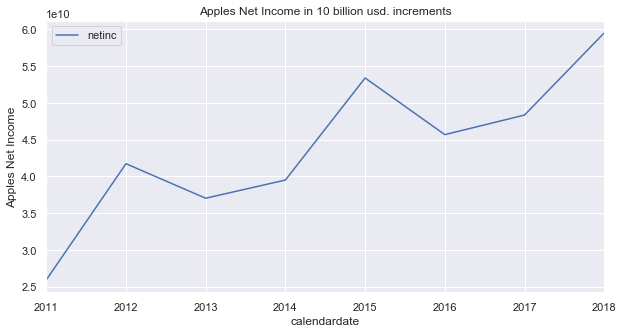

In [280]:
df_apple.plot('calendardate',['netinc'],
              figsize=(10,5), title="Apples Net Income in 10 billion usd. increments",).set_ylabel("Apples Net Income")

## Insights from Net Income

- Apples net income / profits have increased from 26 billion usd (2011) to 59 billion usd (2018)
- Apples year over year profit growth has been on **average 15,1%**

- The cyclicality is mostly due to increased invesments as mentioned by Apples Chief Financial Officer: 
"We've gone through different cycles, sometimes our revenue exceeds our op. ex. growth. Sometimes it's the other way around. Our approach is not changing: we want to invest in the business. Especially in R&D space over past few years to improve user experience, improve our products." https://www.macrumors.com/2019/10/30/apple-4q-2019-results/

# Apples Financial Ratios

- To better understand how Apples valuation has changed from 2011-2018 I take a look into their financial ratios (pb: price/book, pe: price/earnings, ps: price/sales) and the return ratios (roa: return on assets, roe: return on equity, roic: return on invested capital, ros: return on sales) and in general taking a look into how the assets, r&d and gross margin have changed over the time frame


In [404]:
df = quandl.get_table("SHARADAR/SF1", paginate=True)
df_apple = df.loc[df["ticker"]=="AAPL"]

df_apple[['calendardate', 'ticker', 'pb', 'pe', 'ps',  'roa', 'roe','roic','ros','assets', 'rnd', 'grossmargin']]


,calendardate,ticker,pb,pe,ps,roa,roe,roic,ros,assets,rnd,grossmargin
None,,,,,,,,,,,,
240,2018-12-31,AAPL,10.176,18.315,4.105,0.160,0.487,0.206,0.274,365725000000,14236000000,0.383
241,2017-12-31,AAPL,5.939,16.464,3.473,0.140,0.363,0.188,0.280,375319000000,11581000000,0.385
242,2016-12-31,AAPL,4.736,13.293,2.816,0.149,0.356,0.217,0.285,321686000000,10045000000,0.391
243,2015-12-31,AAPL,5.481,12.252,2.799,0.197,0.429,0.322,0.310,290345000000,8067000000,0.401
244,2014-12-31,AAPL,5.408,15.269,3.300,0.178,0.328,0.309,0.293,231839000000,6041000000,0.386
245,2013-12-31,AAPL,3.550,11.842,2.566,0.186,0.291,0.339,0.293,207000000000,4475000000,0.376
246,2012-12-31,AAPL,5.290,14.985,3.996,0.266,0.395,0.517,0.356,176064000000,3381000000,0.439
247,2011-12-31,AAPL,4.892,14.460,3.463,0.256,0.396,0.560,0.316,116371000000,2429000000,0.405


In [283]:
# reference data guide

## Apples Valuation and Return Ratios 

- Detailed overview of Apples valuation with the average, minimum and maximum values over the time period

In [107]:
df_apple = df.loc[df["ticker"]=="AAPL"][['calendardate', 'ticker', 'pb', 'pe', 'ps',  'roa', 'roe','roic','ros',]]

df_apple.describe()

,pb,pe,ps,roa,roe,roic,ros
count,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000
mean,5.684000,14.610000,3.314750,0.19150,0.380625,0.332250,0.300875
std,1.949199,2.161951,0.562039,0.04691,0.060731,0.139757,0.026417
min,3.550000,11.842000,2.566000,0.14000,0.291000,0.188000,0.274000
25%,4.853000,13.032750,2.811750,0.15725,0.349000,0.214250,0.283750
50%,5.349000,14.722500,3.381500,0.18200,0.379000,0.315500,0.293000
75%,5.595500,15.567750,3.603750,0.21175,0.404250,0.383500,0.311500
max,10.176000,18.315000,4.105000,0.26600,0.487000,0.560000,0.356000


## Apples Return Ratios 

Development of Apples return ratios 

- ROE: Return on Equity. A measure of how effectively management is using a company’s assets to create profits.
- ROIC: Return on Invested Capital
- ROA: Return on Assets
- ROS: Return on Sales



Text(0, 0.5, 'Financial Ratios')

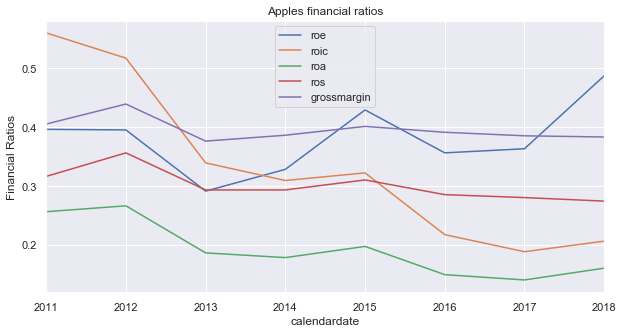

In [405]:
df_apple.plot('calendardate',['roe','roic', 'roa', 'ros', 'grossmargin'],
              figsize=(10,5), title="Apples financial ratios",).set_ylabel("Financial Ratios")

### Insights from Financial Return Ratios
- Apples Return-on-Equity (ROE) hovered between 30% and 40% and ended 2018 at roughly 50%
- Apples Return-On-Invested-Capital (ROIC) was extraordinarily large with 56% in 2011 and has came down to 20%. One of the main reasons is that Apples R&D has increased from 2,3 billion usd (2011) to 14,2 billion usd (2018), which leads to delayed returns on the investment
- Apples Return-on-Assets (ROA) has fallen from over 25% to roughly 10%. The main reason is that Apples assets have tripled from 116 billion usd (2011) to 365 billion usd (2018). 
- Apples Return-on-Sales (ROS) have decreased slightly from 31% to 27% 
- Apples Gross Margin has stayed around 40%, which is very profitable


#### The return ratios display that Apples business has stayed extremely profitable. The reason for the decline of their financial return ratios was mainly due to much higher assets over the years and increasing investments in R&D .  

# Apples Valuation Ratios 

- Development of Apples valuation ratios


Text(0, 0.5, 'Financial Ratios')

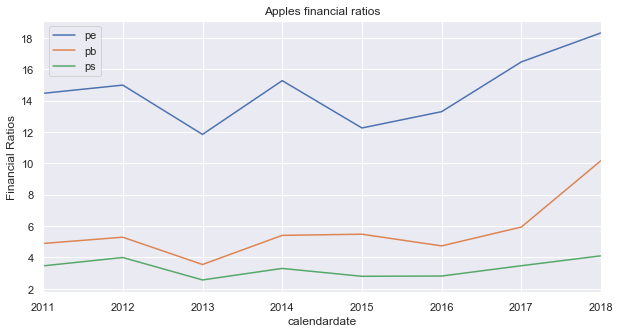

In [213]:
df_apple.plot('calendardate',
              ['pe','pb','ps'],
              figsize=(10,5), 
              title="Apples financial ratios",).set_ylabel("Financial Ratios")

## Insights from Financial Valuation Ratios
- Apple Price/Earning Ratio (PE) has gone up from 14,5 (2011) to 18,3 (2018), which means that the business became more expensive
- Apple Price/Book Ratio (PB) gas gone up from 5 (2011) to 10,1 (2018), which means that the price for Apples total assets has doubled.
- Apples Price/Sales Ratio (PS) has stayed stayed between 2,6 and 4,1, closing at 4,1 in 2018, which means that its valuation has gone up. 

### The valuation ratios display that Apples stock has became more expensive between 2011-2018.  

# Summary
#### Return Ratios
- Apples return ratios display that Apples business has stayed extremely profitable as displayed by the nearly constant gross margin of around 40% and average yearly net income growth of ~15,1%. The reason for the decline of their financial return ratios was mainly due to much higher revenue and assets over the years and increasing investments.

#### Valuation Ratios
- Apples valuation ratios (Price-Earnings-Ratio = PE) display that Apples stock has became more expensive between 2011-2018.
- Apples Price-Earnings-Ratio (PE) has significantly gone up between 2011-2018, now being 18x p/e, 20% above its - -average of 15x p/e (between 2011-2018) and 55% higher than its lowest p/e of 11,84 (2013)

Thanks for taking the time to read my notebook :-)